In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 323M/325M [00:11<00:00, 41.3MB/s]
100% 325M/325M [00:11<00:00, 30.7MB/s]


In [ ]:
!unzip /content/skin-cancer-malignant-vs-benign.zip

In [6]:
import cv2
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pickle


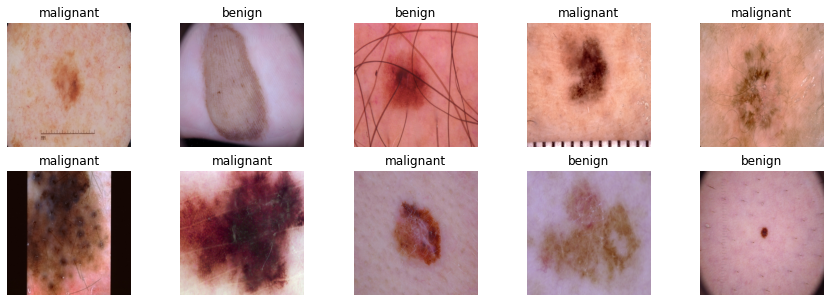

In [9]:
w = 10
h = 10
fig = plt.figure(figsize=(15,5))
columns = 5
rows = 2
fielName = "/content/train"

for i in range(0, columns*rows ):
  index = random.randint(0,1)
  folderName = os.path.join((fielName), os.listdir(fielName)[index])
  img = cv2.imread(folderName+'/'+(os.listdir(os.path.join((fielName), os.listdir(fielName)[index]))[i]))
  fig.add_subplot(rows, columns, i+1)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title(os.path.basename(folderName))

plt.show()

In [ ]:
def Convert_Data(c, label, dir_data):
    count = c
    if label == 0:
        label = 0
    else :
        label = 1
    for img_name in os.listdir(dir_data):
        img = cv2.imread(dir_data+"/"+img_name)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_one_column_arr = img_gray.reshape((img.shape[0]*img.shape[1]),1)  
        df[str(count)] = img_one_column_arr[:,0]
        y_values.append(label)
        count += 1
    return count

In [ ]:
df = pd.DataFrame()
y_values = [] 

benign = 0
malignant = 1

count = 0
data1 = Convert_Data(count, benign, "/content/train/benign")
data2 = Convert_Data(data1, malignant, "/content/train/malignant")
data3 = Convert_Data(data2, benign, "/content/test/benign")
data4 = Convert_Data(data3, malignant, "/content/test/malignant")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
plt.hist(data.iloc[: , -1])

In [ ]:
x_data = df.T

In [ ]:
x_data

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,137,138,141,144,142,144,145,148,150,146,...,122,125,119,128,133,129,128,132,132,132
1,217,220,222,221,217,218,218,220,218,219,...,216,214,218,215,221,223,227,222,218,220
2,162,164,171,171,175,177,177,180,183,182,...,148,148,148,150,148,150,151,153,154,153
3,156,156,158,149,140,154,155,154,157,162,...,159,150,148,154,156,154,156,156,147,152
4,20,27,37,43,53,62,71,80,89,95,...,15,15,14,13,12,13,12,13,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,85,132,134,135,140,141,138,137,138,141,...,121,120,117,117,116,114,113,109,108,108
3293,156,157,158,158,158,157,157,158,160,160,...,159,161,162,162,160,158,157,157,159,159
3294,56,51,43,53,53,43,57,54,59,47,...,60,33,66,49,31,26,21,23,30,25
3295,182,179,178,178,170,172,176,175,172,164,...,169,170,172,173,173,172,173,173,171,171


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_values, test_size=0.2, random_state=5)

# Key Nearest Neighbours (KNN)

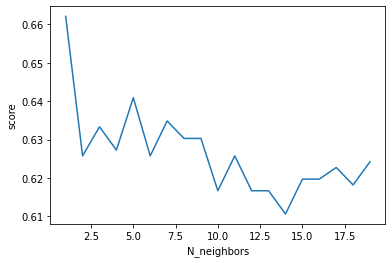

In [ ]:
from sklearn import metrics

k_range = range(1, 20)
scores_knn = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores_knn.append(knn.score(x_test, y_test))

plt.plot(range(1, 20), scores_knn)
plt.xlabel("N_neighbors")
plt.ylabel("score")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
history = knn.fit(x_train, y_train)
score_knn = knn.score(x_test, y_test)
print("The Best KNN Accuracy : ",score_knn)

The Best KNN Accuracy :  0.6621212121212121


In [ ]:
y_prediction_knn = knn.predict(x_test)
c_matrix_knn = confusion_matrix(y_test, y_prediction_knn)

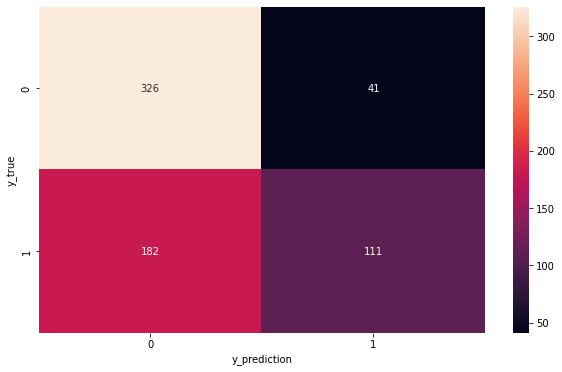

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(c_matrix_knn, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()

# Support Vector Machine (SVM)

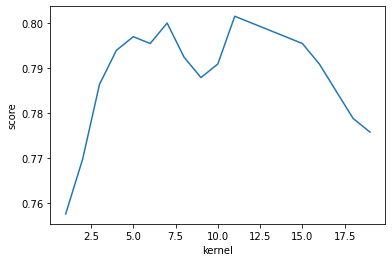

In [ ]:
C_range = range(1, 20)
scores_svm = []

for c in C_range:
    svm = SVC(C=c)
    svm.fit(x_train, y_train)
    scores_svm.append(svm.score(x_test, y_test))

plt.plot(range(1, 20), scores_svm)
plt.xlabel("kernel")
plt.ylabel("score")
plt.show()

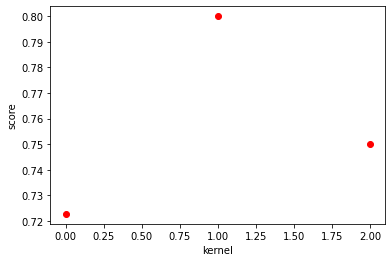

In [ ]:
kernel = ['linear', 'rbf', 'poly']
scores = []
for k in kernel:
    svc = SVC(kernel=k, C=12)
    svc.fit(x_train, y_train)
    scores.append(svc.score(x_test, y_test))
    
plt.plot(range(3), scores, 'ro')
plt.xlabel("kernel")
plt.ylabel("score")
plt.show()

In [ ]:
svm = SVC(C=12)
svm.fit(x_train, y_train)

SVC(C=12)

In [ ]:
score_knn = svm.score(x_test, y_test)
print("The Best KNN Accuracy : ",score_knn)

The Best KNN Accuracy :  0.8


In [ ]:
y_prediction_svm = svm.predict(x_test)
c_matrix_svm = confusion_matrix(y_test, y_prediction_svm)

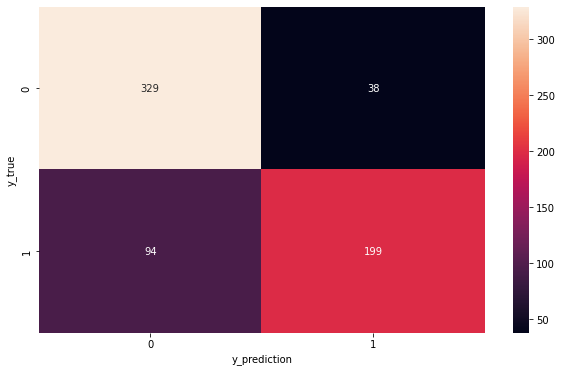

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(c_matrix_svm, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
score_dt = dt.score(x_test, y_test)
print("Decision Tree Accuracy : ", score_dt)

Decision Tree Accuracy :  0.6803030303030303


In [ ]:
y_prediction_dt = dt.predict(x_test)

c_matrix_dt = confusion_matrix(y_test, y_prediction_dt)

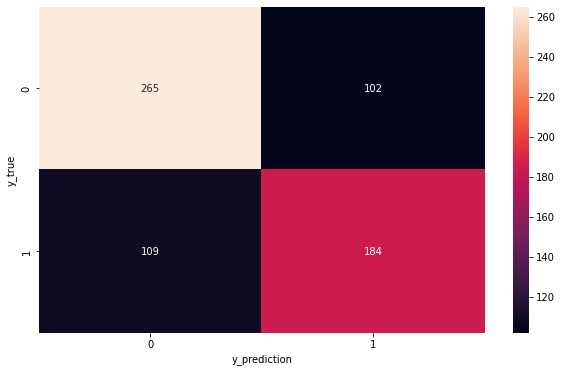

In [ ]:
f, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(c_matrix_dt, annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_true")
plt.show()

In [ ]:
model1 = 'knn.sav'
model2 = 'svm.sav'
model3 = 'decision_tree.sav'

In [ ]:
pickle.dump(knn, open(model1, 'wb'))
pickle.dump(svm, open(model2, 'wb'))
pickle.dump(dt, open(model3, 'wb'))

In [ ]:
# df1 = pd.DataFrame()
# img = cv2.imread("/content/mel.jpg")
# img = cv2.resize(img, (224,224))
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_one_column_arr = img_gray.reshape((img.shape[0]*img.shape[1]), 1)
# df1[str(0)] = img_one_column_arr[:,0]        

In [ ]:
# loaded_model = pickle.load(open(model1, 'rb'))
# result = loaded_model.predict(df1.T)
# print(result)

[1]
